# Tutorial 6
## Unsupervised Machine Learning Algorithms

In [1]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mglearn

   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/581.4 kB ? eta -:--:--
   ---------------------------------------- 581.4/581.4 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the data into df_cancer array
df_cancer = load_breast_cancer()

# Transform the array dataset into pandas dataframe
df = pd.DataFrame(data = df_cancer.data, columns = df_cancer.feature_names)

# Add the target variable to the dataframe for the cancer cells as '0: benign' and '1: malignant'
df['y'] = pd.Series(df_cancer.target)

# Display the records
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# Load the independent colums
X = df_cancer.data

# Load the target variable for the cancel cells classification
y = df_cancer.target

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((569, 30), (569,), (426, 30), (143, 30), (426,), (143,))

In [7]:
from sklearn.preprocessing import StandardScaler

# Create an object using Standard scalscaler
scaler = StandardScaler()

# Train the StandardScaler model
scaler.fit(X_train)

# transform data
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)
X_scaled = scaler.transform(X)

# print dataset after scaling
print(X_train_scaled, '\t', X_test_scaled, '\t', X_scaled)

[[ 0.30575375  2.59521918  0.46246107 ...  1.81549702  2.10164609
   3.38609913]
 [ 0.23351721 -0.05334893  0.20573083 ...  0.5143837   0.14721854
   0.05182385]
 [ 0.15572401  0.18345881  0.11343692 ...  0.69446859  0.263409
  -0.10011179]
 ...
 [ 0.85586279  1.19276558  0.89773369 ...  1.12967374  0.75591781
   2.97065009]
 [-0.02486734  0.44095848 -0.08606303 ... -0.52515632 -1.1291423
  -0.45561747]
 [-0.30270019 -0.20968802 -0.37543871 ... -0.967865   -1.54361274
  -1.31500348]] 	 [[ 0.15850234 -1.23049032  0.25369143 ... -0.05738582 -0.08689656
   0.48863884]
 [-0.2638036  -0.15450952 -0.23961754 ...  1.41330744  1.77388495
   2.02105229]
 [-0.32492682 -0.76147305 -0.35407811 ... -0.1354226   0.87210827
   0.71179432]
 ...
 [ 0.25852216 -0.06024625  0.21500053 ... -0.03937733 -1.03202789
  -0.84910706]
 [ 1.46709506  0.95825694  1.49824869 ...  0.62693676  0.07438274
  -0.45739797]
 [-0.61942964  0.42256565 -0.6261235  ... -0.48013509  0.34318156
  -0.6134881 ]] 	 [[ 1.07535074 -

In [13]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(`)

# transform data into the first two principal components
X_pca = pca.fit_transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


In [14]:
# The amount of variance explained by each of the selected components.
print(pca.explained_variance_ratio_)

[0.43863795 0.19147604]


In [12]:
0.43863795 + 0.19147604 + 0.09381143

0.72392542

In [15]:
total_var = pca.explained_variance_ratio_.sum() * 100
print(X_pca, total_var)

[[ 9.26723854  1.87627703]
 [ 2.09319468 -3.79682286]
 [ 5.60902561 -1.24679393]
 ...
 [ 1.08434755 -2.06180611]
 [10.50623055  1.40238442]
 [-5.4910384  -0.50452082]] 63.0113991268056


Text(0, 0.5, 'Second principal component')

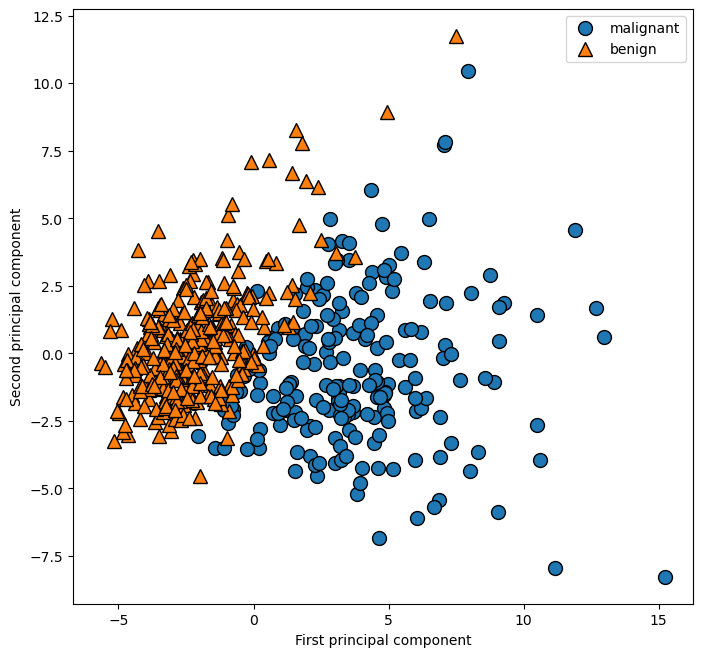

In [16]:
# plot first vs. second principal component, colored by class
plt.figure(figsize = (8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], df_cancer.target)
plt.legend(df_cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [11]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.20911879  0.10154093  0.21825266  0.20984502  0.15285648  0.25548994
   0.26290614  0.26022458  0.1471697   0.07899236  0.19293074  0.01637328
   0.19989146  0.18249312  0.01717361  0.17535114  0.16281182  0.18120347
   0.04923632  0.10217729  0.21665001  0.10284812  0.22629139  0.21134939
   0.14008917  0.2227857   0.24092256  0.25065539  0.14091359  0.15341305]
 [-0.24407058 -0.06898522 -0.22643822 -0.24047124  0.18338224  0.14102156
   0.04062272 -0.05264897  0.18616984  0.37829079 -0.11738378  0.07651225
  -0.10313325 -0.15517328  0.19126812  0.2119397   0.18286461  0.10601114
   0.19049122  0.24788161 -0.22731106 -0.0521478  -0.20915187 -0.22476935
   0.17433699  0.13513221  0.08521369 -0.02344035  0.15323214  0.28984098]]


<Axes: >

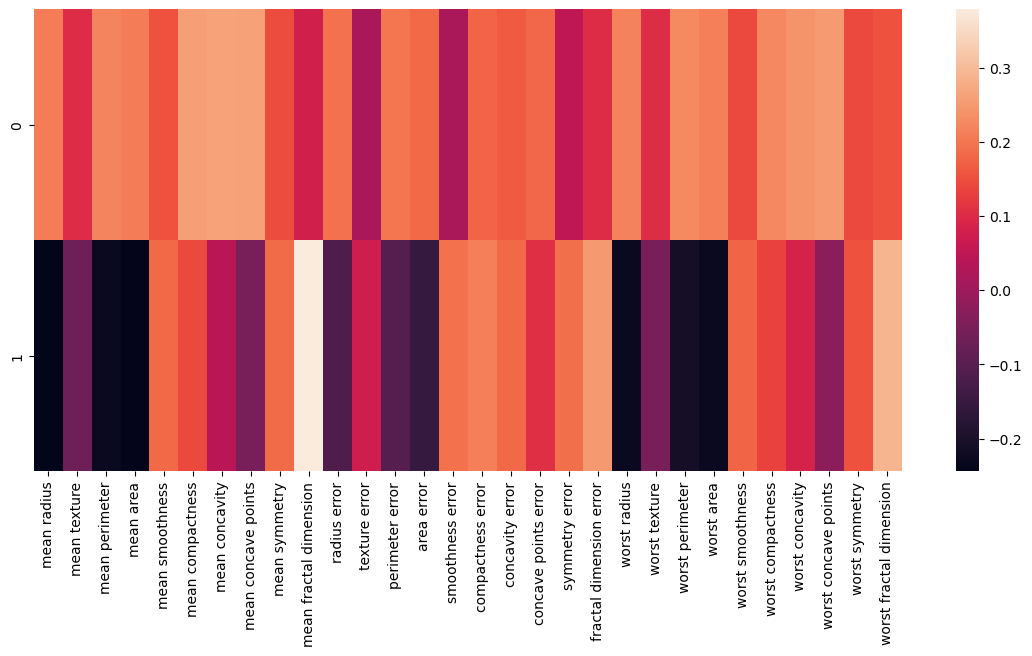

In [12]:
import seaborn as sns
df_comp = pd.DataFrame(pca.components_, columns = df_cancer['feature_names'])
  
plt.figure(figsize =(14, 6))
  
# plotting heatmap
sns.heatmap(df_comp)

## k-Means Clustering

In [13]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)

# Train the model
kmeans.fit(X)

KMeans(n_clusters=3)

In [14]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [15]:
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


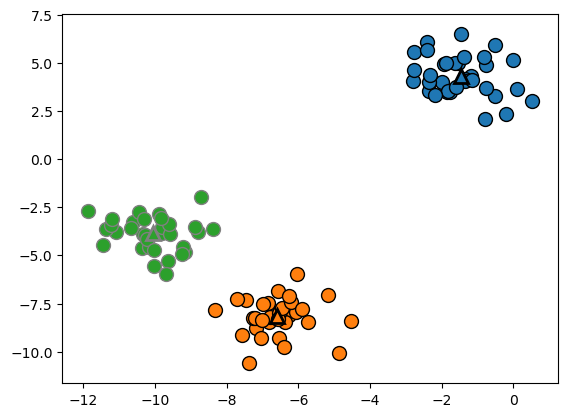

In [16]:
# Use mglearn to plot the graph
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')

mglearn.discrete_scatter(
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2)

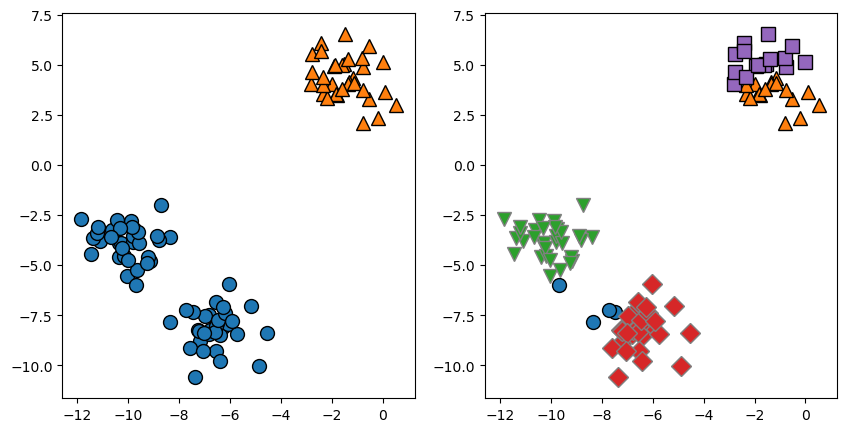

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

Text(0, 0.5, 'Feature 1')

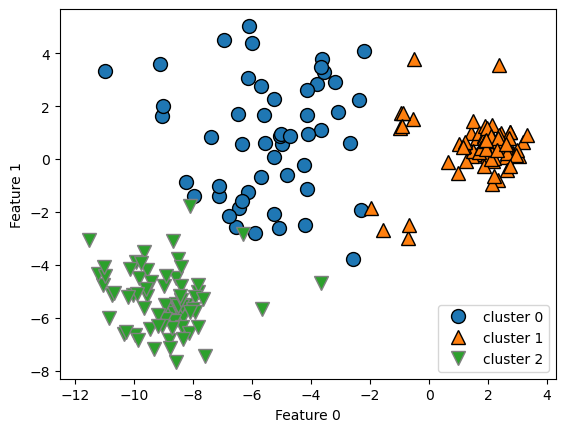

In [18]:
X_varied, y_varied = make_blobs(n_samples=200,
cluster_std=[1.0, 2.5, 0.5],
random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## CASE STUDY

In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import math
np.random.seed(0)

### Seeds Dataset: Silhouette Score
Per the UCI Data Repository, the fields in the Seeds dataset we will be using correspond to:

1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

In [20]:
# Load the dataset
seeds = pd.read_csv('Seed_Data.csv')

seeds

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,2


In [21]:
X = seeds[['A','P','C','LK','WK','A_Coef','LKG']]
y = seeds['target']

In [22]:
# See what our features look like
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       210 non-null    float64
 1   P       210 non-null    float64
 2   C       210 non-null    float64
 3   LK      210 non-null    float64
 4   WK      210 non-null    float64
 5   A_Coef  210 non-null    float64
 6   LKG     210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [23]:
kmeans_seeds = KMeans(n_clusters = 3)
kmeans_seeds.fit(X)
C = kmeans_seeds.labels_
C.shape
assign_seeds = C.reshape(-1, 1)
# assign_seeds

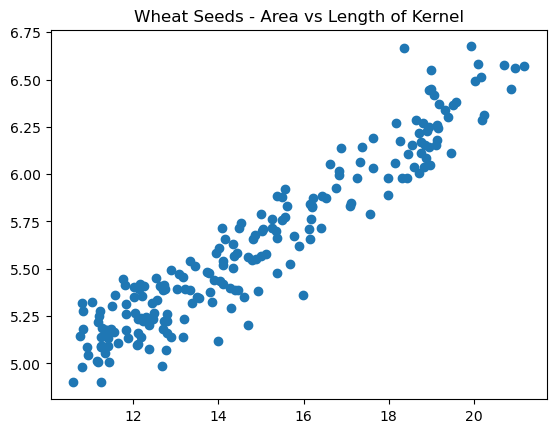

In [24]:
plt.scatter(X['A'], X['LK'])
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()

In [25]:
import numpy as np

# To plot the cluster data, consider two columns
X1 = X['A']
X2 = X['LK']

# Transform into numpy array
X11 = X1[:, ]
X22 = X2[:, ]

# Display rows and columns of the arrays
X11.shape, X22.shape, assign_seeds.shape

((210,), (210,), (210, 1))

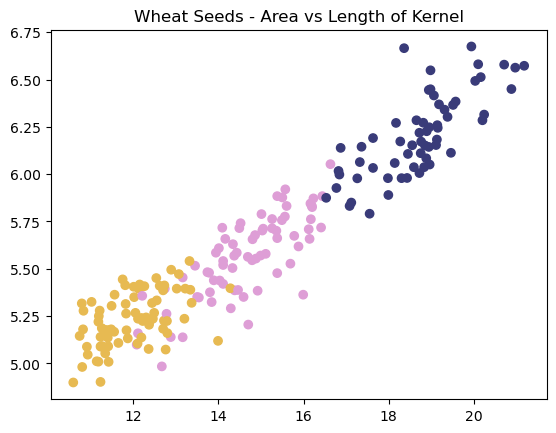

In [26]:
plt.scatter(X11, X22, c = assign_seeds, cmap = 'tab20b')
plt.title('Wheat Seeds - Area vs Length of Kernel')
plt.show()

## Task
* Plot the clusters for other columns and check the distribution of data for different clusters.

## Reference: 
* Introduction to Machine Learning with Python A Guide for Data Scientists, Andreas C. Müller and Sarah Guido, Copyright © 2017, O'Reilly.